In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/sonar.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
df = shuffle(df)
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
183,0.0269,0.0383,0.0505,0.0707,0.1313,0.2103,0.2263,0.2524,0.3595,0.5915,...,0.0167,0.0199,0.0145,0.0081,0.0045,0.0043,0.0027,0.0055,0.0057,M
136,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059,0.0021,M
114,0.0414,0.0436,0.0447,0.0844,0.0419,0.1215,0.2002,0.1516,0.0818,0.1975,...,0.0045,0.0136,0.0113,0.0053,0.0165,0.0141,0.0077,0.0246,0.0198,M
160,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M
147,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,M


In [4]:
dataset = df.values
print(dataset)

[[0.0269 0.0383 0.0505 ... 0.0055 0.0057 'M']
 [0.043 0.0902 0.0833 ... 0.0059 0.0021 'M']
 [0.0414 0.0436 0.0447 ... 0.0246 0.0198 'M']
 ...
 [0.0257 0.0447 0.0388 ... 0.0255 0.018 'R']
 [0.0443 0.0446 0.0235 ... 0.0152 0.01 'M']
 [0.018 0.0444 0.0476 ... 0.0073 0.0022 'M']]


In [5]:
dataset.shape

(207, 61)

In [6]:
x = dataset[:,:60].astype('float32')
y = dataset[:,60]
print(x[0])
print(y[0])

[0.0269 0.0383 0.0505 0.0707 0.1313 0.2103 0.2263 0.2524 0.3595 0.5915
 0.6675 0.5679 0.5175 0.3334 0.2002 0.2856 0.2937 0.3424 0.5949 0.7526
 0.8959 0.8147 0.7109 0.7378 0.7201 0.8254 0.8917 0.982  0.8179 0.4848
 0.3203 0.2775 0.2382 0.2911 0.1675 0.3156 0.1869 0.3391 0.5993 0.4124
 0.1181 0.3651 0.4655 0.4777 0.3517 0.092  0.1227 0.1785 0.1085 0.03
 0.0346 0.0167 0.0199 0.0145 0.0081 0.0045 0.0043 0.0027 0.0055 0.0057]
M


In [7]:
print(x.shape)
print(y.shape)

(207, 60)
(207,)


In [8]:
le = LabelEncoder()
encoded_y = le.fit_transform(y)
encoded_y

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0])

In [9]:
train_data = x[:145,:]
train_labels = encoded_y[:145]
test_data = x[145:,:]
test_labels = encoded_y[145:]
print('Train Data: ',train_data.shape)
print('Test Data: ',test_data.shape)

Train Data:  (145, 60)
Test Data:  (62, 60)


In [10]:
model = models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [12]:
model.fit(train_data, train_labels, epochs=40, batch_size=2)

Train on 145 samples
Epoch 1/40
145/145 [==============================] - 2s 11ms/sample - loss: 0.6793 - acc: 0.5241
Epoch 2/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.6341 - acc: 0.7586
Epoch 3/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.5992 - acc: 0.7034 0s - loss: 0.5889 - acc: 0.715
Epoch 4/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.5704 - acc: 0.7448
Epoch 5/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.5472 - acc: 0.7586
Epoch 6/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.5170 - acc: 0.7655 0s - loss: 0.5169 - acc: 0.78
Epoch 7/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.5023 - acc: 0.7655
Epoch 8/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.4802 - acc: 0.8069
Epoch 9/40
145/145 [==============================] - 0s 2ms/sample - loss: 0.4644 - acc: 0.8000
Epoch 10/40
145/145 [=======================

In [13]:
loss, acc = model.evaluate(test_data, test_labels, verbose=2)
print(acc)

62/1 - 0s - loss: 0.6017 - acc: 0.8065
0.8064516


# Training model with validation

In [14]:
train_data = x[:145,:]
train_labels = encoded_y[:145]
val_data = x[145:166,:]
val_labels = encoded_y[145:166]
test_data = x[166:,:]
test_labels = encoded_y[166:]

In [15]:
print('Train Data: ',train_data.shape)
print('Validation Data: ',val_data.shape)
print('Test Data:', test_data.shape)

Train Data:  (145, 60)
Validation Data:  (21, 60)
Test Data: (41, 60)


In [16]:
model = models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [17]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=4, validation_data=(val_data,val_labels))

Train on 145 samples, validate on 21 samples
Epoch 1/20
145/145 [==============================] - 1s 10ms/sample - loss: 0.6920 - acc: 0.5517 - val_loss: 0.6305 - val_acc: 0.6190
Epoch 2/20
145/145 [==============================] - 0s 1ms/sample - loss: 0.6525 - acc: 0.6276 - val_loss: 0.6212 - val_acc: 0.7619
Epoch 3/20
145/145 [==============================] - 0s 890us/sample - loss: 0.6287 - acc: 0.6828 - val_loss: 0.5988 - val_acc: 0.9048
Epoch 4/20
145/145 [==============================] - 0s 973us/sample - loss: 0.6017 - acc: 0.7103 - val_loss: 0.5571 - val_acc: 0.7143
Epoch 5/20
145/145 [==============================] - 0s 980us/sample - loss: 0.5839 - acc: 0.7448 - val_loss: 0.5583 - val_acc: 0.9048
Epoch 6/20
145/145 [==============================] - 0s 1ms/sample - loss: 0.5716 - acc: 0.7172 - val_loss: 0.5403 - val_acc: 0.8571
Epoch 7/20
145/145 [==============================] - 0s 980us/sample - loss: 0.5396 - acc: 0.7379 - val_loss: 0.4945 - val_acc: 0.9048
Epoch 8/

In [18]:
his_dict = history.history

In [19]:
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = range(1,len(loss)+1)

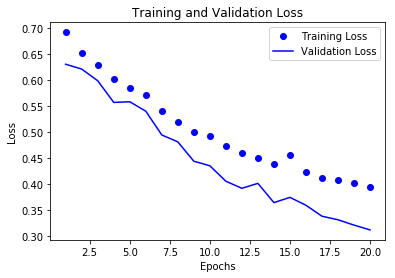

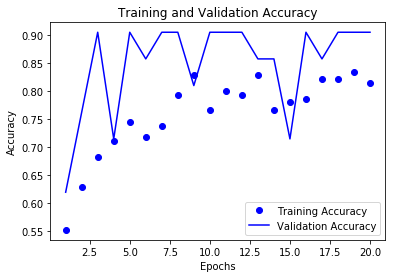

In [20]:
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.clf()

plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [21]:
model.evaluate(test_data, test_labels)

41/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6293041866000105, 0.6585366]

# Appling k-Fold Validation

In [22]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

Using TensorFlow backend.


In [23]:
seed = 7
np.random.seed(seed)

In [24]:
def model():
    model = models.Sequential()
    model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [25]:
estimator = KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_labels, cv=kfold)

In [26]:
print("Results(Accuracy): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results(Accuracy): 80.62% (12.54%)


In [27]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, train_data, train_labels, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 86.86% (10.81%)
